In [1]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import datetime
from gensim.models import Word2Vec

In [3]:
movies=pd.read_csv("./gdrive/My Drive/python/Movie2vec/movies.csv")

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings=pd.read_csv("./gdrive//My Drive/python/Movie2vec/ratings.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [5]:
print(len(movies))
print(len(ratings))

58098
27753444


In [6]:
ratings_movie=pd.merge(ratings,movies,on='movieId')

r_dict=[]
grouped=ratings_movie.groupby(['userId'])
for idx, user in grouped:
  r_dict.append(user.sort_values(['timestamp'])['title'].values)

print(r_dict[1])

['Driving Miss Daisy (1989)' 'Escape from L.A. (1996)' 'L.A. Story (1991)'
 'Little Shop of Horrors (1986)' 'Manhattan (1979)'
 'Risky Business (1983)' 'Stripes (1981)' 'Big Chill, The (1983)'
 'Hackers (1995)' 'Harold and Maude (1971)' 'American Graffiti (1973)'
 'Arlington Road (1999)' 'Broadcast News (1987)'
 'Room with a View, A (1986)' 'Sex, Lies, and Videotape (1989)']


In [7]:
corpus=[]

for i in range(len(r_dict)):
  corpus.append([])
  for j in r_dict[i]:
    corpus[i].append(j)

print(corpus[1])
print(len(corpus))

['Driving Miss Daisy (1989)', 'Escape from L.A. (1996)', 'L.A. Story (1991)', 'Little Shop of Horrors (1986)', 'Manhattan (1979)', 'Risky Business (1983)', 'Stripes (1981)', 'Big Chill, The (1983)', 'Hackers (1995)', 'Harold and Maude (1971)', 'American Graffiti (1973)', 'Arlington Road (1999)', 'Broadcast News (1987)', 'Room with a View, A (1986)', 'Sex, Lies, and Videotape (1989)']
283228


In [8]:
start_time = datetime.datetime.now()

model=Word2Vec(corpus[:],size=100)
#model=Word2Vec(corpus[:],size=100,min_count=5)

end_time = datetime.datetime.now() # 종료시간
elapsed_time = end_time - start_time
print('걸린 시간:',elapsed_time)

걸린 시간: 0:03:08.646026


In [9]:
model_result1 = model.wv.most_similar("Toy Story (1995)",topn=15)
result1=pd.DataFrame(model_result1, columns=["title","consine similarity"])

result1[:]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,title,consine similarity
0,"Fugitive, The (1993)",0.556205
1,Babe (1995),0.552394
2,Apollo 13 (1995),0.546721
3,"Lion King, The (1994)",0.540342
4,Aladdin (1992),0.531489
5,Seven (a.k.a. Se7en) (1995),0.530302
6,Finding Nemo (2003),0.528846
7,"Sixth Sense, The (1999)",0.519956
8,Saving Private Ryan (1998),0.510336
9,"Incredibles, The (2004)",0.510024


In [10]:
model_result2 = model.wv.most_similar("Interstellar (2014)",topn=15)
result2=pd.DataFrame(model_result2, columns=["title","consine similarity"])

result2[:]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,title,consine similarity
0,The Imitation Game (2014),0.843055
1,Whiplash (2014),0.810923
2,Ex Machina (2015),0.806919
3,The Martian (2015),0.779101
4,Mad Max: Fury Road (2015),0.748590
5,Intouchables (2011),0.745441
6,Inside Out (2015),0.743713
7,Edge of Tomorrow (2014),0.740230
8,Django Unchained (2012),0.738039
9,Gone Girl (2014),0.728170


In [11]:
model_result3 = model.wv.most_similar("Modern Times (1936)",topn=15)
result3=pd.DataFrame(model_result3, columns=["title","consine similarity"])

result3[:]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,title,consine similarity
0,City Lights (1931),0.809053
1,"Gold Rush, The (1925)",0.796155
2,Bicycle Thieves (a.k.a. The Bicycle Thief) (a....,0.744870
3,"Great Dictator, The (1940)",0.741915
4,"General, The (1926)",0.710775
5,"Kid, The (1921)",0.655751
6,Rashomon (Rashômon) (1950),0.637549
7,M (1931),0.627994
8,Yojimbo (1961),0.614135
9,His Girl Friday (1940),0.593529


In [0]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

#path_gothic = "/home/ururu/fonts/NanumGothic.ttf"
#prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

In [13]:
vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [14]:
df = pd.DataFrame(X_tsne, index=vocab, columns=["x", "y"])
df.head()

,x,y
Hollow Man (2000),30.529472,-5.911082
Three Colors: Blue (Trois couleurs: Bleu) (1993),50.064102,-7.842968
Event Horizon (1997),60.096363,6.868336
¡Three Amigos! (1986),46.635258,16.024479
"Running Man, The (1987)",39.220570,21.115932


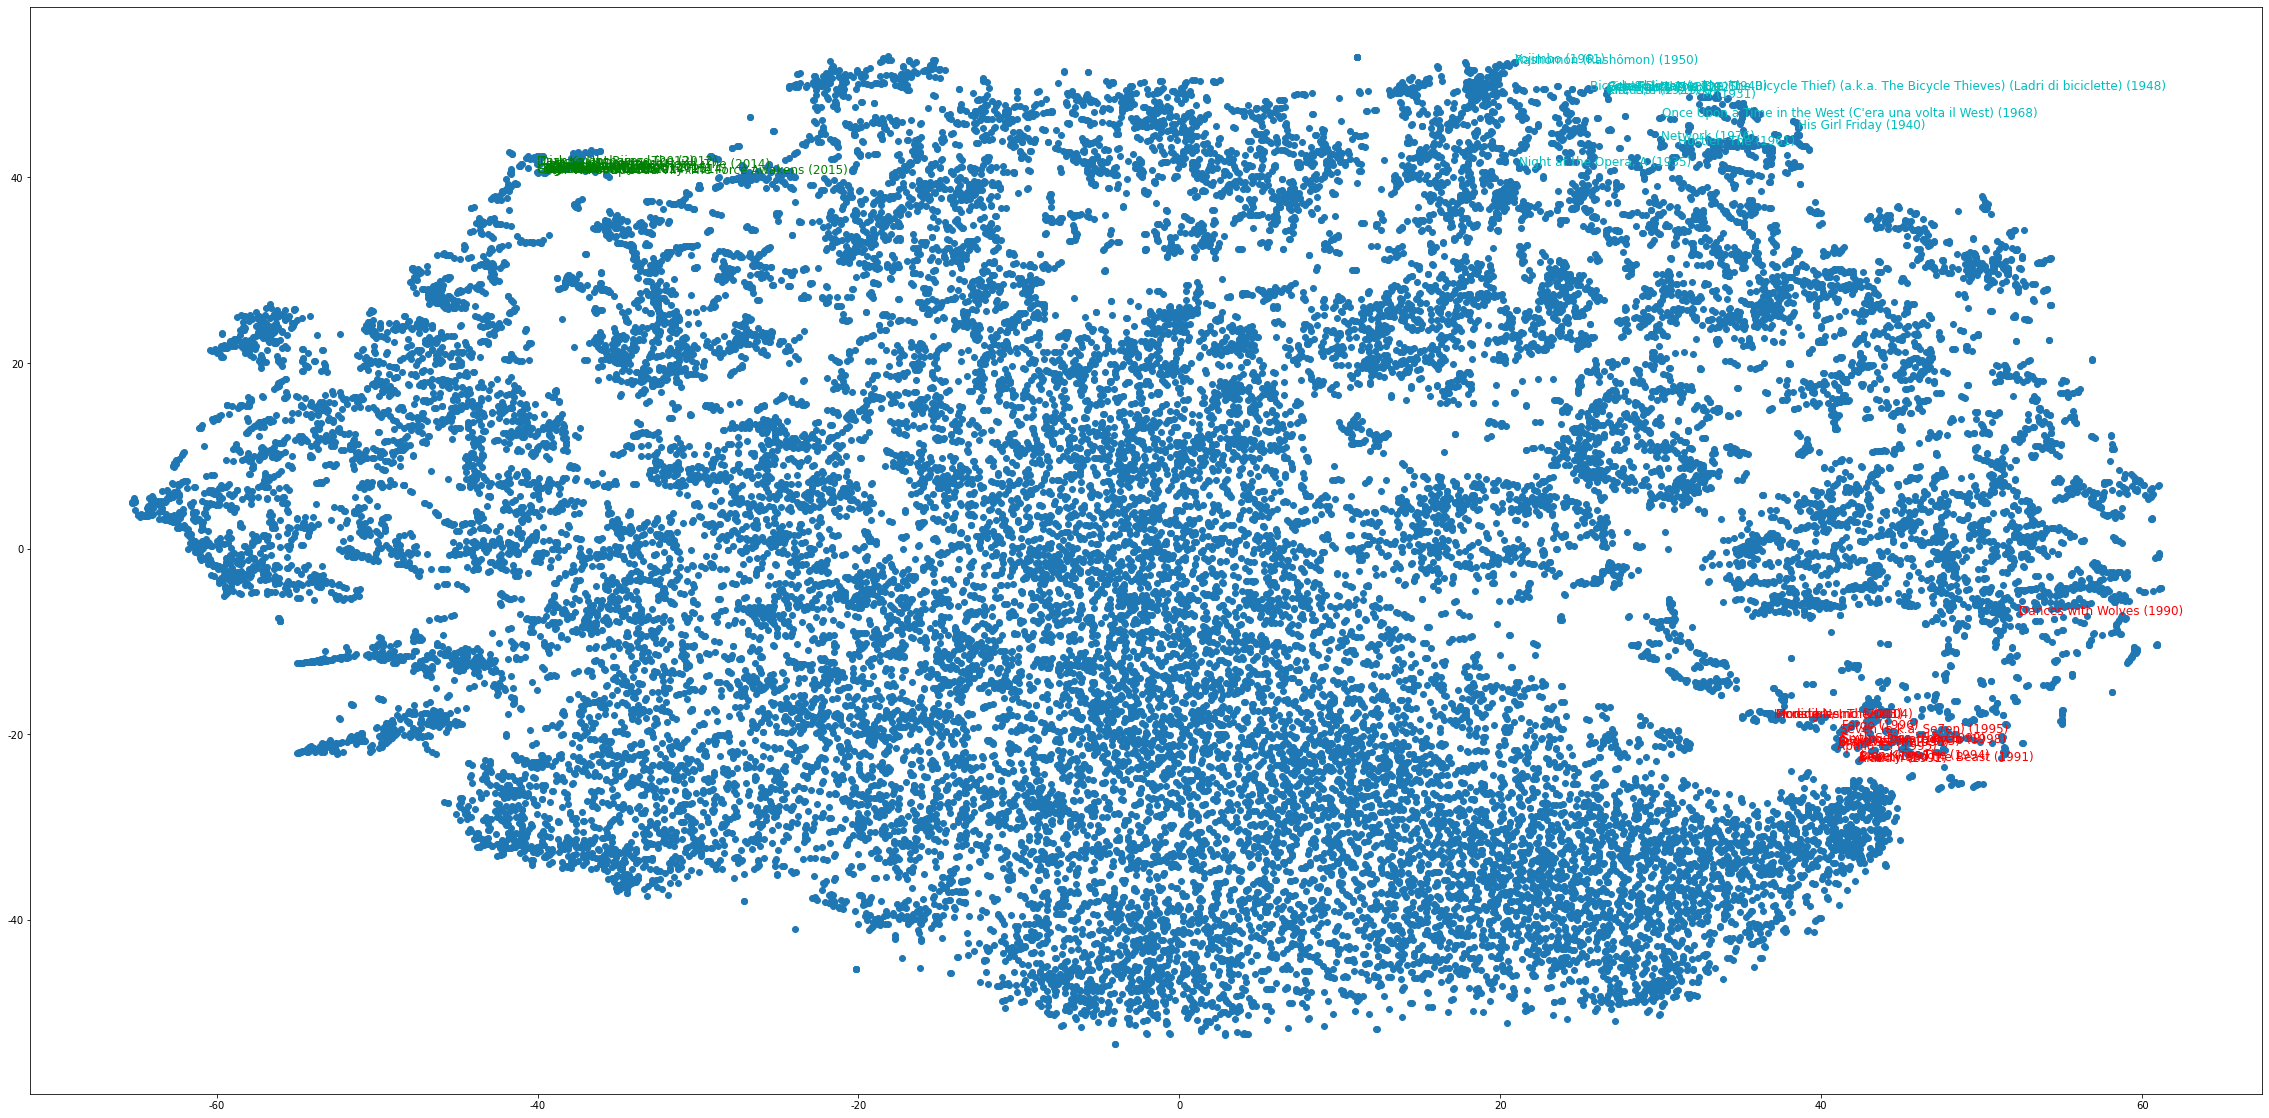

In [15]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"],df["y"])

for word, pos in list(df.iterrows()):
    for a, b in model_result1:
        if a==word :
            ax.annotate(word, pos, fontsize=12, color="r")
    
    for a, b in model_result2:
        if a==word :
            ax.annotate(word, pos, fontsize=12, color="g")
    
    for a, b in model_result3:
        if a==word :
            ax.annotate(word, pos, fontsize=12, color="c")
    
plt.show()